In [2]:
# Set up encoding to UTF-8 and install necassary packages
import os
os.environ["PYTHONIOENCODING"] = "utf-8"

import ezpadova
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [3]:
# Use the IPython matplotlib widget backend for inline interactive plots in VS Code
%matplotlib widget

RuntimeError: 'widget' is not a recognised GUI loop or backend name

In [ ]:
# Define Target Metallicity
target_feh_0 = 0
target_feh_n05 = -0.5

# Retreive Isochrone Data, set age to 5 Gyr
# Use MH to give specific [Fe/H] values, Z gives metallicity fraction
feh_0 = ezpadova.get_one_isochrone(age_yr=5e9, MH=target_feh_0, label='parsec_v12s')
feh_n05 = ezpadova.get_one_isochrone(age_yr=5e9, MH=target_feh_n05, label='parsec_v12s')

Querying http://stev.oapd.inaf.it/cgi-bin/cmd...
Retrieving data...
Querying http://stev.oapd.inaf.it/cgi-bin/cmd...
Retrieving data...


In [ ]:
# Define terms for plotting
feh_0_logL = feh_0['logL']
feh_0_logTe = feh_0['logTe']

feh_n05_logL = feh_n05['logL']
feh_n05_logTe = feh_n05['logTe']

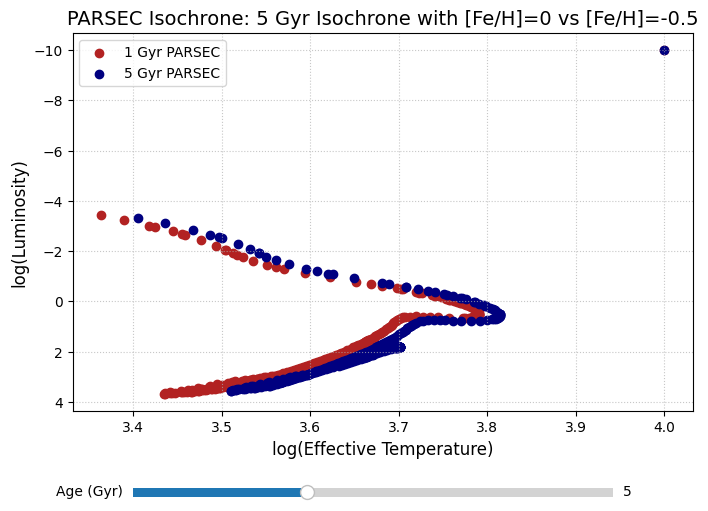

In [ ]:
#Plotting
# Making room for a slider
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.25)

plt.scatter(feh_0_logTe, feh_0_logL, color='firebrick', label='1 Gyr PARSEC')
plt.scatter(feh_n05_logTe, feh_n05_logL, color='navy', label='5 Gyr PARSEC')

plt.gca().invert_yaxis()  # Magnitudes are brighter at the top
plt.xlabel('log(Effective Temperature)', fontsize=12)
plt.ylabel('log(Luminosity)', fontsize=12)
plt.title('PARSEC Isochrone: 5 Gyr Isochrone with [Fe/H]=0 vs [Fe/H]=-0.5', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()

# Create the slider for age along the x-axis
ax_age = plt.axes([0.2, 0.1, 0.6, 0.03])
s_age = Slider(ax_age, 'Age (Gyr)', 1.0, 12.0, valinit=5.0)

# Create an update function to give the correct information while using the slider
def update(val):
    age_yr = val * 1e9
    # Fetch new data based on slider value
    new_iso = ezpadova.get_one_isochrone(age_yr=age_yr, MH=target_feh_0, label='parsec_v12s')
    
    # Update the scatter plot positions
    # Use set_offsets to update x,y coordinates efficiently
    data = list(zip(new_iso['logTe'], new_iso['logL']))
    plt.scatter.set_offsets(data)
    
    # Update title to show current age
    plt.title.set_text(f'PARSEC Isochrone: Age = {val:.1f} Gyr')
    
    fig.canvas.draw_idle()

# Register the update function with the slider
s_age.on_changed(update)

plt.show()